In [1]:
import numpy as np
import matplotlib.pyplot as plt

# plt.style.use('unirand')
# import matplotlib as mpl
# mpl.rcParams.update(mpl.rcParamsDefault)

In [2]:
# sympy for higher numerical precision of cross-product than np.cross
import sympy as s
def sympycross(u1,u2):
    u1_=s.Matrix(u1)
    u2_=s.Matrix(u2)
    cross=u1_.cross(u2_)
    cross=np.array([i[0] for i in np.array(cross).astype(np.float64)])
    return cross

In [3]:
# spatial 

def Rgen(theta,u): #generalized rotation Matrix by angle theta around axis (3D-vector) u
    xlin=[np.cos(theta)+u[0]**2*(1-np.cos(theta)),u[0]*u[1]*(1-np.cos(theta))-u[2]*np.sin(theta),u[0]*u[2]*(1-np.cos(theta))+u[1]*np.sin(theta)]
    ylin=[u[1]*u[0]*(1-np.cos(theta))+u[2]*np.sin(theta),np.cos(theta)+u[1]**2*(1-np.cos(theta)),u[1]*u[2]*(1-np.cos(theta))-u[0]*np.sin(theta)]
    zlin=[u[2]*u[0]*(1-np.cos(theta))-u[1]*np.sin(theta),u[2]*u[1]*(1-np.cos(theta))+u[0]*np.sin(theta), np.cos(theta)+u[2]**2*(1-np.cos(theta))]
    
    return [xlin,ylin,zlin]

def normed(k): #normalize vector
    return k/np.linalg.norm(k)

def k_gen(theta,phi): #generate k-vector with given in-plane and out-of-plane angle # alternative way
    k0= np.array([0, -np.sin(theta), np.cos(theta)])
    u=normed(sympycross(k0,[1,0,0]))
#     u=normed(np.cross(k0,[1,0,0]))
    k1=np.dot(Rgen(-phi,u),k0)
    return k1

# def k_lattgen(theta,alpha): #generate k-vector with given in-plane and out-of-plane angle
#     phi=np.sign(alpha)*np.arcsin(abs(np.sin(alpha)/np.cos(theta)))
#     k= np.array([np.cos(theta)*np.sin(phi), np.sin(theta), np.cos(theta)*np.cos(phi)])
#     return k


# def k_ingen(phi): #generate k-vector with given in-plane and out-of-plane angle
#     k= np.array([np.sin(phi), 0, np.cos(phi)])
#     return k

def snells3D(k_in, n1, n2, n=np.array([0,0,-1])): #get refraction-vector 
    r=n1/n2
    c=-np.dot(k_in,n)
    k_out=r*k_in+(r*c-np.sqrt(1-r**2*(1-c**2)))*n
    k_out_r=k_in-2*np.dot(k_in,n)*n
    return k_out, k_out_r
    
# def snells3D_reflect(k_in, n): #get refraction-vector 
#     return k_in-2*np.dot(k_in,n)*n

def get_offset_vec(k,th): #get offset vector from incidence-point to exit-point for inventor-plot
    n=[0,0,-1]; dotp=np.dot(k,n)
    l=th/dotp*np.sign(dotp) # sign for right direction
    offs=l*k
    return offs

def fresnel_coeff(n1,n2,ang_in): #[s,p]. Get fresnel-coefficients
    ang_out=np.arcsin(n1/n2*np.sin(ang_in))
    t_s=2*n1*np.cos(ang_in)/(n1*np.cos(ang_in)+n2*np.cos(ang_out))
    t_p=2*n1*np.cos(ang_in)/(n2*np.cos(ang_in)+n1*np.cos(ang_out))
    r_s=t_s-1
    r_p=n2/n1*t_p-1
    return t_s,t_p,r_s,r_p

def evolve(k_in,polvec_in,n1,n2, n=np.array([0,0,-1])): # sympy based cross product
    k_out_transm, k_out_refl=snells3D(k_in,n1,n2,n); 
    spol=normed(sympycross(k_in,k_out_refl)) # s-polarization-vector of interface
    ppol=normed(sympycross(spol,k_in)) # p-polarization-vector of interface
#     print(k_in, spol,ppol, n1)
#     print("polvec", polvec_in)
    angle_in=np.arccos(np.dot(k_in,-n))
    t_s,t_p,r_s,r_p=fresnel_coeff(n1,n2,angle_in) # fresnel s/p
    s_comp=np.vdot(spol,polvec_in); p_comp=np.vdot(ppol,polvec_in) # s/p-component of input-wave
    ppol_transm=sympycross(k_out_transm,spol) # update ppol to after interface
    ppol_refl=sympycross(k_out_refl,spol) # update ppol to after interface
    polvec_out_t=p_comp*ppol_transm*t_p+s_comp*spol*t_s # polarization of transmitted wave
    polvec_out_r=p_comp*ppol_refl*r_p+s_comp*spol*r_s # polarization of reflected
    return k_out_transm, polvec_out_t,k_out_refl,polvec_out_r

def angle(k1,k2):
    return float((np.arccos(np.abs(np.dot(k1.T,k2))))*360/2/np.pi)

# def fresnel_s(n1,n2,ang_in,ang_out):
#     return [2*n1*np.cos(ang_in)/(n1*np.cos(ang_in)+n2*np.cos(ang_out)),2*n1*np.cos(ang_in)/(n2*np.cos(ang_in)+n1*np.cos(ang_out))]

# def fresnel_p(n1,n2,ang_in,ang_out):
#     return 2*n1*np.cos(ang_in)/(n2*np.cos(ang_in)+n1*np.cos(ang_out))

In [4]:
# phi=1E-4 # in-plane angle
# theta=0 # out-of-plane angle
# k1=k_gen(phi,theta) # init
# pol_k1=normed([0,1,0]) #polariazion of wave 1
# evolve(k1,pol_k1,nair,nfs) # interface 1 

In [5]:
# def sympycross(u1,u2):
#     u1_=s.Matrix(u1)
#     u2_=s.Matrix(u2)
#     cross=u1_.cross(u2_)
#     cross=np.array([i[0] for i in np.array(cross_result).astype(np.float64)])
#     return cross

In [6]:
# glass-cell geometry # z-lattice
phi=33*(2*np.pi/360) # in-plane angle
theta=-10/2*(2*np.pi/360) # out-of-plane angle
# phi=45*2*np.pi/360
# theta=0
nair=1
nfs=1.455 # (1.461 for 532nm, 1.450 for 1064nm)
th_g=4
th_cell=12
n=np.array([0,0,-1])

In [7]:
# zlatt
# below: get total offset vector from input to output-point glasscell
k1=k_gen(phi,theta) # init
# input
k2,k1_r=snells3D(k1, nair, nfs) #ag
offs1=get_offset_vec(k2,th_g)
k3,k2_r=snells3D(k2, nfs, nair) #ga
# in-cell
offs2=get_offset_vec(k3,th_cell)
# output
k4,k3_r=snells3D(k3, nair, nfs) #ag
offs3=get_offset_vec(k3,th_g)
k5,_=snells3D(k4, nfs, nair) #ga
total_offs=offs1+offs2+offs3 # total offset
# rayoffs-total_offs
# r0 no offset
# r1 (first reflection)
offs2_r=get_offset_vec(k2_r,th_g)
offs_r1=offs1+offs2_r
# r2 (second reflection)
offs3_r=get_offset_vec(k3_r,th_cell)
offs_r2=offs1+offs2+offs3_r+offs2_r
# r3 (third reflection)
offs_r3=offs1+offs2+offs3+2*offs2_r+offs3_r

print("Offset-vector [mm]-input_output_glasscell:",total_offs)

print("\nOffset-vector reflection")
for i in range(1,4):
    print("r{:.0f}:".format(i), globals()['offs_r{:.0f}'.format(i)])

Offset-vector [mm]-input_output_glasscell: [  1.92786098 -12.00142168  20.        ]

Offset-vector reflection
r1: [ 0.51753729 -3.22180037  0.        ]
r2: [  3.02117579 -18.80758261   0.        ]
r3: [  3.69721752 -23.01611317   0.        ]


In [8]:
# glass-cell geometry x-lattice

# phi=45*2*np.pi/360
# theta=0
nair=1
nfs=1.455 # (1.461 for 532nm, 1.450 for 1064nm)
th_g=4
th_cell=12
n=np.array([0,0,-1])

In [9]:
# primary
k1=k_gen(phi,theta) # init
pol_k1=normed(np.cross(k_gen(phi,theta),k_gen(phi,-theta))) #polariazion of wave 1
k2,pol_k2,k1r,pol_k1r=evolve(k1,pol_k1,nair,nfs) # interface 1 
k3,pol_k3,k2r,pol_k2r=evolve(k2,pol_k2,nfs,nair) # interface 2 
k4,pol_k4,k3r,pol_k3r=evolve(k3,pol_k3,nair,nfs) # interface 3 
k5,pol_k5,k4r,pol_k4r=evolve(k4,pol_k4,nfs,nair) # interface 4 

# internal reflection interface 2 back
k2rt,pol_k2rt,_,_=evolve(k2r,pol_k2r,nfs,nair,n=-n)
# internal reflection interface 3 back
k3rt,pol_k3rt,_,_=evolve(k3r,pol_k3r,nair,nfs, n=-n) # interface 2 transm
k3rtt,pol_k3rtt,_,_=evolve(k3rt,pol_k3rt,nfs,nair, n=-n) # interface 1 transm
# internal reflection interface 4 back
k4rt,pol_k4rt,_,_=evolve(k4r,pol_k4r,nfs,nair,-n) # interface 3 transm
k4rtt,pol_k4rtt,_,_=evolve(k4rt,pol_k4rt,nair,nfs,-n) # interface 2 transm
k4rttt,pol_k4rttt,_,_=evolve(k4rtt,pol_k4rtt,nfs,nair,-n) # interface 1 transm

# at atoms
pol_rot_angle_primary=np.arccos(np.dot(normed(pol_k1),normed(pol_k3)))*360/2/np.pi

# primary beam
print('\033[1m'+"Primary beam:"+'\033[0m')
print('\033[1m'+"@atoms:"+'\033[0m')
print("Polarization rotated by: {:.3F}°".format(pol_rot_angle_primary))
print("electric field ampltude: {:.3F}".format(np.linalg.norm(pol_k3)))
print("power equivalent: {:.3F}".format(np.linalg.norm(pol_k3)**2))
print('\033[1m'+"@after glasscell:"+'\033[0m')
print("electric field ampltude: {:.3F}".format(np.linalg.norm(pol_k5)))
print("power equivalent: {:.3F}".format((np.linalg.norm(pol_k5))**2))
# reflections
print("\n"+'\033[1m'+"Reflections:"+'\033[0m')
for i, name in enumerate(["pol_k1r","pol_k2rt","pol_k3rtt","pol_k4rttt"]):
    print('\033[1m'+"r{}:".format(i)+'\033[0m')
    print("electric field ampltude: {:.3F}".format(np.linalg.norm(globals()[name])))
    print("power equivalent: {:.3F}".format((np.linalg.norm(globals()[name]))**2))

Primary beam:
@atoms:
Polarization rotated by: 0.282°
electric field ampltude: 0.981
power equivalent: 0.962
@after glasscell:
electric field ampltude: 0.963
power equivalent: 0.926

Reflections:
r0:
electric field ampltude: 0.138
power equivalent: 0.019
r1:
electric field ampltude: 0.135
power equivalent: 0.018
r2:
electric field ampltude: 0.132
power equivalent: 0.017
r3:
electric field ampltude: 0.130
power equivalent: 0.017


In [10]:
# Compare with polarisation rotation from bottom mirror given by "polarization analysis.ipynb"
eps_bot=normed(np.array([ 0.84000401, -0.0608539 , -0.53915681]))
print("dot-product: bottom beam, top beam",-np.dot(eps_bot,normed(pol_k3)))

dot-product: bottom beam, top beam -0.3489819178995894


##### x lattice box:

In [11]:
# x lattice box

# glass-cell geometry
phi=-26.8/2*(2*np.pi/360) # in-plane angle
theta=-15.9*(2*np.pi/360) # out-of-plane angle
# below: get total offset vector from input to output-point glasscell
k1=k_gen(phi,theta) # init
# input
k2,k1_r=snells3D(k1, nair, nfs) #ag
offs1=get_offset_vec(k2,th_g)
k3,k2_r=snells3D(k2, nfs, nair) #ga
# in-cell
offs2=get_offset_vec(k3,th_cell)
# output
k4,k3_r=snells3D(k3, nair, nfs) #ag
offs3=get_offset_vec(k3,th_g)
k5,_=snells3D(k4, nfs, nair) #ga
total_offs=offs1+offs2+offs3 # total offset
# rayoffs-total_offs
# r0 no offset
# r1 (first reflection)
offs2_r=get_offset_vec(k2_r,th_g)
offs_r1=offs1+offs2_r
# r2 (second reflection)
offs3_r=get_offset_vec(k3_r,th_cell)
offs_r2=offs1+offs2+offs3_r+offs2_r
# r3 (third reflection)
offs_r3=offs1+offs2+offs3+2*offs2_r+offs3_r

print("Offset-vector [mm]-input_output_glasscell: ",total_offs)

print("\nOffset-vector reflection")
for i in range(1,4):
    print("r{:.0f}:".format(i), globals()['offs_r{:.0f}'.format(i)])

Offset-vector [mm]-input_output_glasscell:  [ 5.4616429   4.44335965 20.        ]

Offset-vector reflection
r1: [1.55274116 1.26324396 0.        ]
r2: [8.58064964e+00 6.98085046e+00 4.44089210e-16]
r3: [10.52833829  8.56540686  0.        ]


## Below: dispersive glassplates

58.18181818181818 27.876625571913394


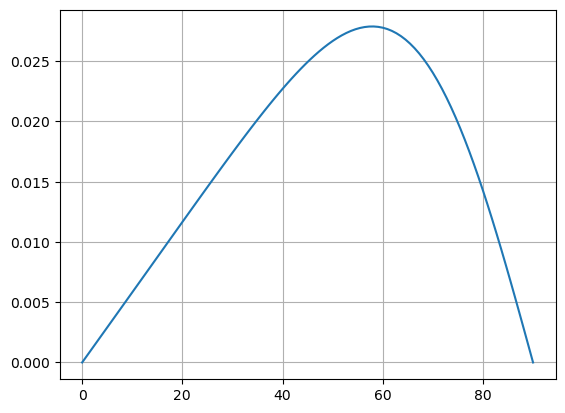

In [12]:
# Offset from th=9.5 mm thick plate
n_g= 1.4607
n_r=1.4496
theta1=45*2*np.pi/360; th=9.5

def d_chrom_func(theta1, th):
    theta1=theta1*2*np.pi/360
    theta2_g=np.arcsin(np.sin(theta1)/n_g); theta2_r=np.arcsin(np.sin(theta1)/n_r)
    l_g=th/np.cos(theta2_g); l_r=th/np.cos(theta2_r)
    d_g=th/np.cos(theta2_g)*np.sin(theta1-theta2_g); d_r=th/np.cos(theta2_r)*np.sin(theta1-theta2_r)
    d_chrom=d_g-d_r
    return d_chrom

x=np.linspace(0,90,100)
y=d_chrom_func(x,th=6.35)
plt.plot(x, y)
plt.grid()
x_max_ind=y.argmax(axis=0)
x_max=x[x_max_ind]
y_max=y[x_max_ind]

print(x_max, y_max*1000)

In [13]:
# fused silica
n_g= 1.4607
n_r=1.4496
k_r=2*np.pi/(1064E-6) # in 1/mm
a_l=6.1E-6

# dispersive glass pair
def fphi_r(theta1): # per pair per mm
    theta2_g=np.arcsin(np.sin(theta1)/n_g); theta2_r=np.arcsin(np.sin(theta1)/n_r)
    l_g=1/np.cos(theta2_g); l_r=1/np.cos(theta2_r)
    d_g=1/np.cos(theta2_g)*np.sin(theta1-theta2_g); d_r=1/np.cos(theta2_r)*np.sin(theta1-theta2_r)
    d_chrom=d_g-d_r
    h_chrom=d_chrom/np.tan(np.pi/2-theta1)
#     d_L=2*(l_g*n_g-l_r*n_r+h_chrom)
#     dphi=2*k_r*d_L
    phi_l=l_r*n_r*k_r
    phi_s=2*(l_g*n_g+h_chrom)*k_r
    dphi=phi_s-2*phi_l
    return 2*dphi

def fphi_a(theta1, a_l=6.1E-6): # per pair per mm
    theta2_r=np.arcsin(np.sin(theta1)/n_r)
    l_r=1/np.cos(theta2_r)
    phi_l=l_r*n_r*k_r
    dphi=phi_l*a_l/np.pi
    return 2*dphi

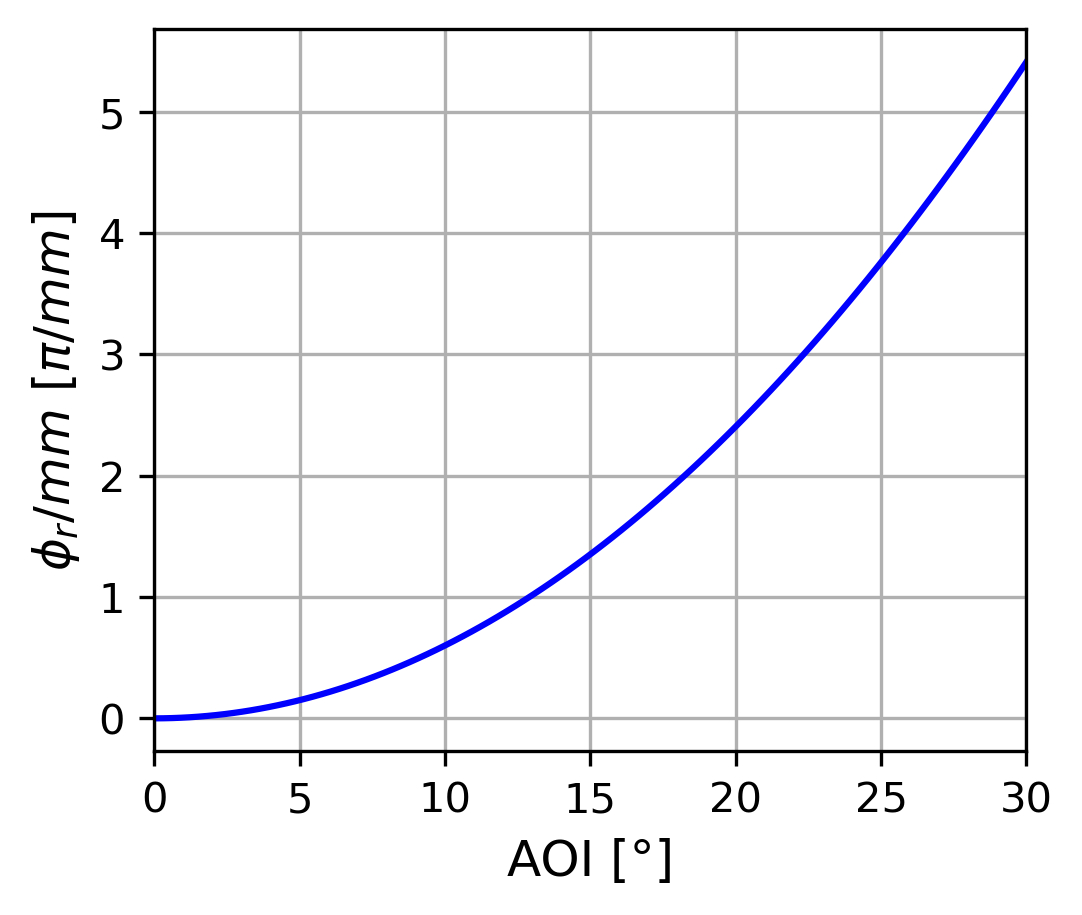

In [23]:
textwidth=5.78853 #in
ratio=1.2
lengo=0.45*textwidth*ratio
fig=plt.figure(figsize=(lengo*ratio,lengo), dpi=300)

thetarange=np.linspace(0,30*2*np.pi/360,100)
f_relspace=fphi_r(thetarange)
f_absspace=fphi_a(thetarange)

plt.plot(thetarange*360/2/np.pi,(f_relspace-f_relspace[0])/np.pi, color="blue")
plt.xlim((thetarange[0]*360/2/np.pi,thetarange[-1]*360/2/np.pi))


# plt.legend()
plt.grid()
# plt.xlim([0,30])
# plt.ylim([0,5.5])
plt.xlabel("AOI [°]", fontsize=12)
plt.ylabel(r"$\phi_r/mm\ [\pi/mm]$", fontsize=12)
# plt.savefig("images/rel-phase by angle.pdf",bbox_inches="tight")
# plt.show()

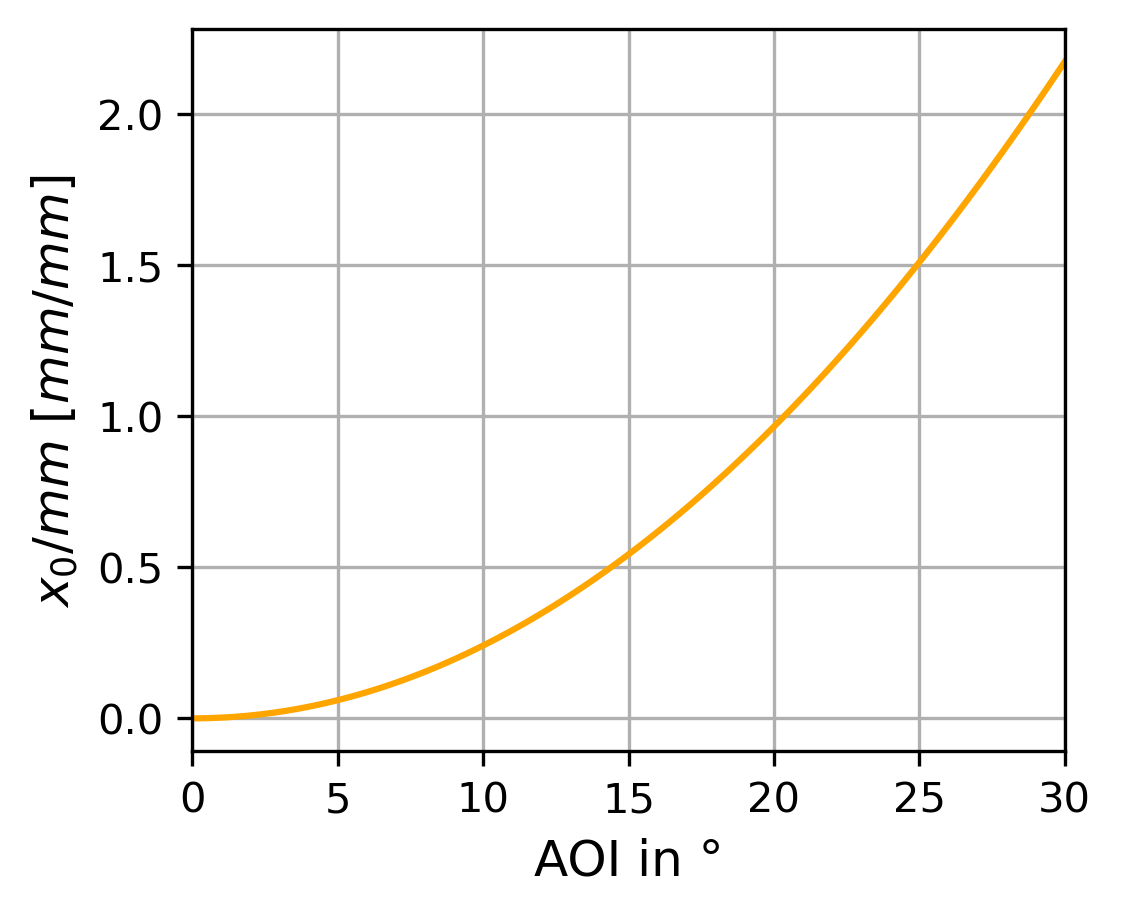

In [26]:
textwidth=5.78853 #in
ratio=1.2
lengo=0.45*textwidth*ratio
fig=plt.figure(figsize=(lengo*ratio,lengo), dpi=300)

thetarange=np.linspace(0,30*2*np.pi/360,100)
f_relspace=fphi_r(thetarange)
f_absspace=fphi_a(thetarange)

plt.plot(thetarange*360/2/np.pi,(f_absspace-f_absspace[0])*1E3, color="orange")
plt.xlim((thetarange[0]*360/2/np.pi,thetarange[-1]*360/2/np.pi))


# plt.legend()
plt.grid()
# plt.xlim([0,30])
# plt.ylim([0,5.5])
plt.xlabel("AOI in °", fontsize=12)
plt.ylabel(r"$x_0/mm \ [mm/mm]$", fontsize=12)
# plt.savefig("images/abs-phase by angle.pdf",bbox_inches="tight")
plt.show()

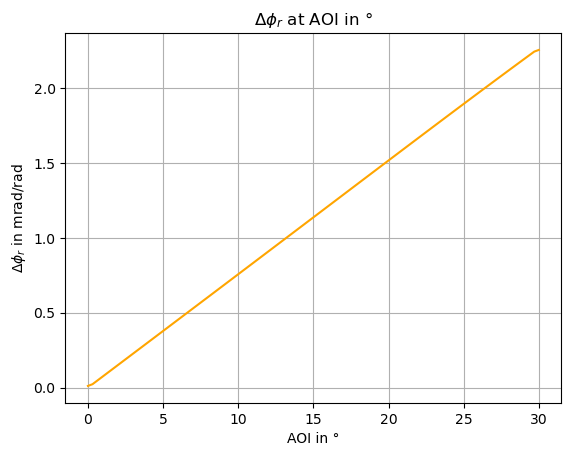

In [20]:
# derivatives for delta phi_r
dAOI=35E-6
dx = thetarange[1]-thetarange[0]
dydx = np.gradient(fphi_r(thetarange), dx)

plt.plot(thetarange*360/2/np.pi,dydx*dAOI*1E3, color="orange")

plt.grid()
# plt.xlim([0,30])
# plt.ylim([0,11.5])
plt.xlabel("AOI in °")
plt.ylabel("$\Delta\phi_r$ in mrad/rad")
plt.title("$\Delta\phi_r$ at AOI in °")
plt.show()

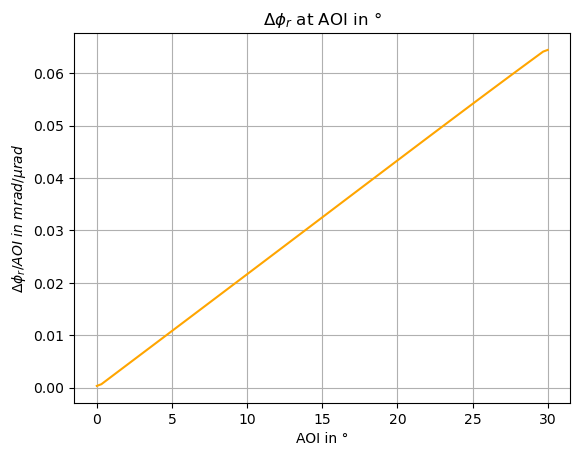

In [27]:
# derivatives for delta phi_r
# dAOI=35E-6
dx = thetarange[1]-thetarange[0]
dydx = np.gradient(fphi_r(thetarange), dx)

plt.plot(thetarange*360/2/np.pi,dydx*1E3/1E6, color="orange")

plt.grid()
# plt.xlim([0,30])
# plt.ylim([0,11.5])
plt.xlabel("AOI in °")
plt.ylabel(r"$\Delta\phi_r/AOI \ in \ mrad/ \mu rad$")
plt.title("$\Delta\phi_r$ at AOI in °")
plt.show()